In [18]:
import os
import numpy as np
import gym
from machina.envs import GymEnv, C2DEnv
import pybulletgym
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline
from example.simple_net import PolNet,VNet
from machina.pols import  GaussianPol, CategoricalPol, MultiCategoricalPol
from machina.vfuncs import DeterministicSVfunc
import torch

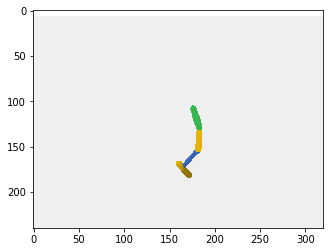

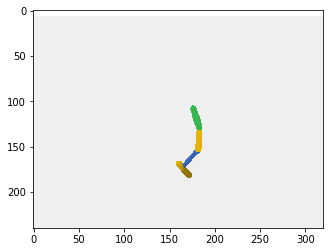

In [19]:
save_mp4 = True
render_plt =True

env_name = 'HopperPyBulletEnv-v0'
#env = GymEnv(env_name, log_dir="./example/garbage/videos", record_video=True)
env = gym.make(env_name)
obs = env.reset()
# show your environment. 
#env.render() # An Error occurs here: who use CUI based computer should comment out.

# check dimension of observation space and action space
observation_space = env.observation_space
action_space = env.action_space
print('obs:', observation_space)
print('act:', action_space)

# policy
pol_net = PolNet(observation_space, action_space)
best_path = '/home/hirobuchi.ryota/rl_lab/machina/data/expert_pols/pol_max.pkl'
if isinstance(action_space, gym.spaces.Box):
    pol = GaussianPol(observation_space, action_space, pol_net)
elif isinstance(action_space, gym.spaces.Discrete):
    pol = CategoricalPol(observation_space, action_space, pol_net)
elif isinstance(action_space, gym.spaces.MultiDiscrete):
    pol = MultiCategoricalPol(
        observation_space, action_space, pol_net)
else:
    raise ValueError('Only Box, Discrete, and MultiDiscrete are supported')

pol.load_state_dict(torch.load(best_path))
from gym import wrappers
import time
env = gym.make(env_name)
os.makedirs("./example/garbage/videos", exist_ok =True)
if save_mp4:
    env = wrappers.Monitor(env, "./example/garbage/videos",force=True)#, video_callable=(lambda ep: ep % 100 == 0))
o = env.reset()

done = False

for step in range(200): # show 300 frames (=20 sec)
    if done:
        time.sleep(1) # when the boundary　of eposode
        o = env.reset()
    if step%5 ==0 and render_plt:
        plt.imshow(env.render(mode='rgb_array'))
        display.clear_output(wait=True)
        display.display(plt.gcf())
    ac_real, ac, a_i = pol.deterministic_ac_real(torch.tensor(o, dtype=torch.float))
    ac_real = ac_real.reshape(pol.action_space.shape)
    next_o, r, done, e_i = env.step(np.array(ac_real))
    o = next_o
    
    

In [10]:
import io
import base64
from IPython.display import HTML
def render_mp4(video_path):
    video = io.open(video_path, 'r+b').read()
    encoded = base64.b64encode(video)
    return HTML(data='''<video alt="test" controls>
                    <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                 </video>'''.format(encoded.decode('ascii')))


In [7]:
video_path = "/home/hirobuchi.ryota/rl_lab/machina/example/garbage/videos/openaigym.video.1.9282.video000008.mp4"
video = io.open(video_path, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                    <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                 </video>'''.format(encoded.decode('ascii')))

In [20]:

video = io.open('/home/hirobuchi.ryota/rl_lab/machina/data/expert_pols/movie/openaigym.video.0.17136.video000027.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''
    <video width="360" height="auto" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''
.format(encoded.decode('ascii')))